In [12]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D, Dense, Flatten

In [2]:
!unzip HarryPotter.zip -d HarryPotter
print('-'*20+'\n Upload Completed!!\n'+'-'*20)

Archive:  HarryPotter.zip
  inflating: HarryPotter/harry_potter_reviews.csv  
--------------------
 Upload Completed!!
--------------------


In [3]:
hp= pd.read_csv('/content/HarryPotter/harry_potter_reviews.csv')

In [4]:
hp.head()

,user_id,user_sex,user_age,user_country,rating,comment,favourite_character,date
0,0,female,50,Germany,2.5,"""The transitions between scenes were awkward, ...",Severus Snape,2004-12-27
1,1,female,23,Spain,4.0,"""Severus Snape's role adds an intriguing layer.""",Severus Snape,2003-11-22
2,2,male,32,France,3.0,"""The pacing was a bit slow, but the characters...",Ron Weasley,2005-09-16
3,3,female,24,Turkey,4.5,"""Hagrid's love for magical creatures is heartw...",Rubeus Hagrid,2002-09-17
4,4,female,40,Spain,5.0,"""Neville Longbottom's courage is awe-inspiring.""",Neville Longbottom,2004-10-17


In [9]:
hp['comment'][11]

'"A magical adventure with a touch of nostalgia."'

In [6]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 491 entries, 0 to 490
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              491 non-null    int64  
 1   user_sex             491 non-null    object 
 2   user_age             491 non-null    int64  
 3   user_country         491 non-null    object 
 4   rating               491 non-null    float64
 5   comment              491 non-null    object 
 6   favourite_character  491 non-null    object 
 7   date                 491 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 30.8+ KB


In [7]:
#feature target
sentences = hp['comment'].tolist()
labels = hp['favourite_character'].tolist()

In [18]:
#One Hot Encoding
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(labels)# הופך מילים למספרים
label_encoded = to_categorical(int_encoded)

In [17]:
int_encoded

array([7, 7, 5, 6, 4, 6, 7, 0, 5, 3, 3, 0, 5, 3, 2, 3, 3, 1, 5, 5, 3, 7,
       3, 1, 1, 4, 2, 3, 1, 5, 3, 4, 3, 4, 1, 3, 4, 2, 0, 5, 0, 1, 0, 7,
       3, 6, 0, 2, 5, 4, 3, 5, 4, 5, 6, 3, 6, 2, 3, 7, 6, 0, 0, 1, 3, 7,
       1, 0, 2, 6, 0, 4, 6, 2, 7, 1, 2, 0, 3, 3, 4, 3, 5, 5, 7, 6, 6, 0,
       2, 0, 7, 4, 2, 3, 2, 0, 5, 7, 4, 0, 0, 2, 2, 4, 4, 6, 7, 6, 5, 2,
       6, 2, 6, 3, 5, 4, 4, 7, 5, 2, 6, 3, 2, 1, 6, 4, 1, 5, 6, 5, 6, 2,
       6, 3, 6, 3, 3, 6, 2, 2, 5, 3, 7, 5, 0, 0, 0, 5, 6, 7, 3, 7, 4, 3,
       2, 6, 2, 3, 3, 7, 7, 7, 5, 0, 7, 6, 3, 4, 5, 2, 2, 2, 4, 6, 6, 3,
       3, 6, 0, 2, 1, 4, 3, 2, 4, 3, 3, 4, 2, 6, 2, 4, 3, 3, 5, 6, 0, 6,
       2, 2, 2, 6, 1, 6, 0, 4, 7, 7, 2, 4, 5, 5, 1, 1, 5, 0, 2, 4, 2, 1,
       1, 0, 2, 2, 0, 7, 5, 4, 3, 5, 2, 2, 2, 1, 6, 5, 3, 4, 2, 2, 6, 7,
       1, 5, 2, 5, 7, 6, 1, 7, 5, 2, 2, 0, 5, 7, 5, 2, 6, 1, 1, 7, 0, 6,
       6, 6, 3, 5, 5, 2, 6, 6, 1, 5, 1, 2, 2, 5, 3, 6, 3, 5, 4, 1, 7, 3,
       5, 3, 4, 3, 6, 5, 6, 4, 1, 5, 1, 7, 5, 6, 5,

In [19]:
label_encoded

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]])

In [20]:
set(int_encoded)

{0, 1, 2, 3, 4, 5, 6, 7}

In [21]:
label_encoder = LabelEncoder()
int_encoded = label_encoder.fit_transform(labels)# הופך מילים למספרים
labels_encoded2 = tf.one_hot(int_encoded, depth =len(set(int_encoded)))

In [22]:
labels_encoded2

<tf.Tensor: shape=(491, 8), dtype=float32, numpy=
array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)>

In [23]:
tokenizer = Tokenizer (oov_token = '<OOV>')
tokenizer.fit_on_texts (sentences)
word_index = tokenizer.word_index
sequences = tokenizer.texts_to_sequences(sentences)
padded = pad_sequences(sequences, padding ='post')

In [24]:
padded.shape

(491, 15)

In [25]:
list(word_index.items())[:10]

[('<OOV>', 1),
 ('the', 2),
 ('and', 3),
 ('is', 4),
 ('a', 5),
 ('of', 6),
 ('magical', 7),
 ('to', 8),
 ('character', 9),
 ('world', 10)]

In [26]:
X_train,X_test, y_train, y_test = train_test_split(padded, label_encoded, test_size =0.2, random_state=42)

In [42]:
model = Sequential ([
    Embedding(input_dim = len(word_index)+1,output_dim =128),
    #flatting
      GlobalAveragePooling1D(),
      Dense(10, activation ='relu'),
      Dense(len(label_encoded[0]), activation = 'softmax')
])

In [29]:
len(label_encoded[0])

8

In [43]:
model.compile(loss = 'categorical_crossentropy',
              optimizer =Adam(),
              metrics = ['accuracy'])

In [40]:
history = model.fit(X_train, y_train, epochs =50, validation_data =(X_test,y_test))

Epoch 1/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - accuracy: 0.1605 - loss: 2.0784 - val_accuracy: 0.3030 - val_loss: 2.0673
Epoch 2/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.3344 - loss: 2.0607 - val_accuracy: 0.3434 - val_loss: 2.0546
Epoch 3/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4052 - loss: 2.0428 - val_accuracy: 0.3939 - val_loss: 2.0383
Epoch 4/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4615 - loss: 2.0185 - val_accuracy: 0.4444 - val_loss: 2.0180
Epoch 5/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6300 - loss: 1.9855 - val_accuracy: 0.5455 - val_loss: 1.9923
Epoch 6/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6916 - loss: 1.9431 - val_accuracy: 0.4848 - val_loss: 1.9641
Epoch 7/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.6954 - loss: 1.9036 - val_accuracy: 0.5253 - val_loss: 1.9288
Epoch 8/50
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7195 - loss: 1.8450 - val_accuracy: 0.5152 - val_los

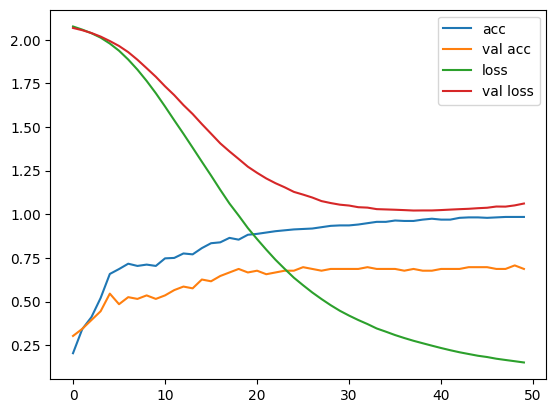

In [44]:
plt.plot(history.history['accuracy'], label = 'acc')
plt.plot(history.history['val_accuracy'], label = 'val acc')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val loss')

plt.legend()

In [37]:
## this is for the site-https://projector.tensorflow.org/
def get_reverse_index(tokenizer):
  return tokenizer.index_word

reverse_index = get_reverse_index(tokenizer)

first_10_pairs = list(reverse_index.items())[:10]

for index, word in first_10_pairs:
  print(index, word)


embedding_layer = model.layers[0]
embeddings = embedding_layer.get_weights()[0]

np.savetxt("vectors.tsv", embeddings, delimiter="\t")

with open("metadata.tsv", "w", encoding='utf-8') as f:
  for i in range(1, 607 + 1): #len(word_index) +1
    word = reverse_index.get(i, "<OOV>")
    f.write(word + "\n")

from google.colab import files
files.download("vectors.tsv")

files.download("metadata.tsv")


1 <OOV>
2 the
3 and
4 is
5 a
6 of
7 magical
8 to
9 character
10 world


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>